In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

In [2]:
bank = pd.read_csv('/Users/Bunny/Documents/Prasanthi/Springboard/Projects/Capstone 1 /Bank Marketing dataset/bank-additional/bank-additional-full.csv', delimiter = ';')

In [3]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
bank.describe()

,age,call_duration,campaign_calls,pdays,previous_calls,emp.var.rate,consumer_price_idx,consumer_conf_idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank['y'] = (bank['y']=='yes').astype(int)

In [7]:
bank['y'].dtype

dtype('int64')

In [8]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [9]:
bank['education']=np.where(bank['education']=='basic.4y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.6y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.9y','Basic',bank['education'])
bank['education']=np.where(bank['education']=='professional.course','Professional Course',bank['education'])
bank['education']=np.where(bank['education']=='university.degree','University Degree',bank['education'])
bank['education']=np.where(bank['education']=='unknown','Unknown',bank['education'])
bank['education']=np.where(bank['education']=='illiterate','No education',bank['education'])
bank['education']=np.where(bank['education']=='high.school','High School',bank['education'])

In [10]:
bank.education.unique()

array(['Basic', 'High School', 'Professional Course', 'Unknown',
       'University Degree', 'No education'], dtype=object)

In [11]:
bank.rename(columns ={'cons.conf.idx':'consumer_conf_idx','cons.price.idx':'consumer_price_idx','previous':'previous_calls','loan':'personal_loan','housing':'housing_loan','duration':'call_duration','default':'loan_default','campaign':'campaign_calls','contact':'contact_type'},inplace = True)

In [12]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'loan_default', 'housing_loan',
       'personal_loan', 'contact_type', 'month', 'day_of_week',
       'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'poutcome', 'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
y_dist = bank.groupby('y').size()/41188*100
y_dist

y
0    88.734583
1    11.265417
dtype: float64

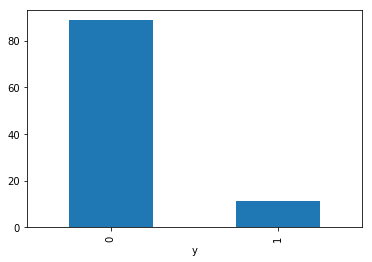

In [14]:
y_dist.plot(kind='bar')

In [15]:
bank.groupby(['y']).mean()

,age,call_duration,campaign_calls,pdays,previous_calls,emp.var.rate,consumer_price_idx,consumer_conf_idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


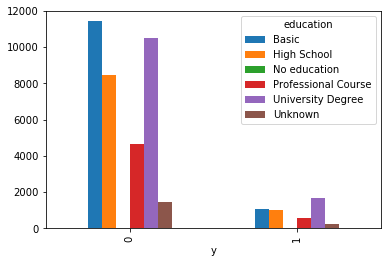

In [16]:
bank.groupby('y').education.value_counts().unstack('education').plot(kind='bar')

In [30]:
# % campaign conversions month wise
pd.crosstab(bank.y, bank.month, normalize='columns')#.plot(kind='bar')

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,0.795213,0.893979,0.510989,0.909534,0.894885,0.494505,0.935653,0.898561,0.561281,0.550877
1,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


In [18]:
pd.crosstab(bank.y, bank.day_of_week, normalize='columns')

day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,0.891913,0.900517,0.878812,0.8822,0.883329
1,0.108087,0.099483,0.121188,0.1178,0.116671


## Creating dummy variables

In [19]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'loan_default', 'housing_loan',
       'personal_loan', 'contact_type', 'month', 'day_of_week',
       'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'poutcome', 'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
#Assigning dummy variables to categorical data with (k-1) dummies
bank_final = pd.get_dummies(bank,drop_first= True)
bank_final.head()

,age,call_duration,campaign_calls,pdays,previous_calls,emp.var.rate,consumer_price_idx,consumer_conf_idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [21]:
bank_final.columns

Index(['age', 'call_duration', 'campaign_calls', 'pdays', 'previous_calls',
       'emp.var.rate', 'consumer_price_idx', 'consumer_conf_idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_No education',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'loan_default_unknown', 'loan_default_yes',
       'housing_loan_unknown', 'housing_loan_yes', 'personal_loan_unknown',
       'personal_loan_yes', 'contact_type_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'pou

In [22]:
bank_final['intercept'] = 1

In [23]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=[i for i in bank_final_vars if i not in Y ]
X1=bank_final[X]
Y1=bank_final[Y]
a = np.ravel(Y1)
a


array([0, 0, 0, ..., 0, 1, 0])

In [24]:
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
result.summary()

         Current function value: 0.207332
         Iterations: 35


/Users/Bunny/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Bunny/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:971: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/Bunny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Bunny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Bunny/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41137
Method:                           MLE   Df Model:                           50
Date:                Sat, 27 May 2017   Pseudo R-squ.:                  0.4110
Time:                        22:34:31   Log-Likelihood:                -8539.6
converged:                      False   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
age                            9.896e-05      0.002      0.047      0.963        -0.004     0.004
call_duration                     0.0047   7.37e-05     63.897      0.000         0.005     0.005
campaign_calls                   -0.0402      0.012     -3.324      0.001        -0.064    -0.016
pdays                            -0.0009      0.000     -4.863      0.000        -0.001    -0.001
previous_calls                   -0.0624      0.058     -1.070      0.285        -0.177     0.052
emp.var.rate                     -1.7570      0.125    -14.042      0.000        -2.002    -1.512
consumer_price_idx                2.1881      0.249      8.790      0.000         1.700     2.676
consumer_conf_idx                 0.0206      0.006      3.285      0.001         0.008     0.033
euribor3m                         0.3318      0.136      2.431      0.015         0.064     0.599
nr.employed                       0.0054      0.003      1.641      0.101        -0.001     0.012
job_blue-collar                  -0.2331      0.080     -2.919      0.004        -0.390    -0.077
job_entrepreneur                 -0.1782      0.126     -1.415      0.157        -0.425     0.069
job_housemaid                    -0.0287      0.146     -0.197      0.844        -0.314     0.257
job_management                   -0.0557      0.085     -0.652      0.515        -0.223     0.112
job_retired                       0.2827      0.105      2.693      0.007         0.077     0.488
job_self-employed                -0.1606      0.118     -1.365      0.172        -0.391     0.070
job_services                     -0.1361      0.086     -1.576      0.115        -0.305     0.033
job_student                       0.2018      0.111      1.811      0.070        -0.017     0.420
job_technician                   -0.0148      0.071     -0.207      0.836        -0.154     0.125
job_unemployed                    0.0170      0.127      0.133      0.894        -0.233     0.267
job_unknown                      -0.0680      0.246     -0.277      0.782        -0.550     0.414
marital_married                  -0.0017      0.069     -0.024      0.981        -0.136     0.133
marital_single                    0.0550      0.078      0.703      0.482        -0.098     0.208
marital_unknown                   0.0325      0.417      0.078      0.938        -0.784     0.849
education_High School             0.0274      0.069      0.396      0.692        -0.108     0.163
education_No education            1.0467      0.753      1.390      0.165        -0.429     2.523
education_Professional Course     0.0951      0.083      1.149      0.251        -0.067     0.257
education_University Degree       0.1758      0.070      2.525      0.012         0.039     0.312
education_Unknown                 0.1295      0.105      1.238      0.216        -0.076     0.335
loan_default_unknown             -0.2979      0.068     -4.393      0.000        -0.431    -0.165
loan_de

In [31]:
# Feature Selection using Random Forest
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X1, a)

In [32]:
feature_imp = clf.feature_importances_
feature_imp

array([  9.00832711e-02,   3.01288779e-01,   4.23912853e-02,
         2.11820483e-02,   2.22544390e-02,   1.98453835e-02,
         3.13590254e-02,   2.15394359e-02,   1.19071085e-01,
         2.38596324e-02,   9.93566577e-03,   4.39808424e-03,
         3.49918768e-03,   7.16620916e-03,   5.85825729e-03,
         4.62219030e-03,   7.35577002e-03,   5.07374354e-03,
         1.17997200e-02,   4.08362296e-03,   1.77701963e-03,
         1.33428780e-02,   1.12702697e-02,   6.65149860e-04,
         1.29984775e-02,   2.23209296e-04,   9.28580724e-03,
         1.38525263e-02,   5.70794828e-03,   8.29609628e-03,
         0.00000000e+00,   2.62893489e-03,   1.91132090e-02,
         2.35634493e-03,   1.28450090e-02,   1.16817524e-02,
         2.30623070e-03,   4.70687864e-04,   2.30976910e-03,
         2.10102086e-03,   6.40303295e-03,   6.19615266e-03,
         2.02514690e-03,   5.88182129e-03,   1.77908639e-03,
         1.15199722e-02,   1.14926153e-02,   1.18367781e-02,
         1.14516652e-02,

In [36]:
list_feature_imp = list(zip(X,feature_imp))
list_feature_imp

[('age', 0.090083271054776135),
 ('call_duration', 0.30128877864827047),
 ('campaign_calls', 0.042391285345015642),
 ('pdays', 0.021182048281530287),
 ('previous_calls', 0.02225443903401373),
 ('emp.var.rate', 0.019845383527815882),
 ('consumer_price_idx', 0.031359025427970075),
 ('consumer_conf_idx', 0.021539435880771056),
 ('euribor3m', 0.1190710851401869),
 ('nr.employed', 0.023859632389114295),
 ('job_blue-collar', 0.0099356657669421224),
 ('job_entrepreneur', 0.0043980842434950158),
 ('job_housemaid', 0.0034991876825529724),
 ('job_management', 0.0071662091610817033),
 ('job_retired', 0.0058582572864822081),
 ('job_self-employed', 0.0046221902964337864),
 ('job_services', 0.0073557700176625843),
 ('job_student', 0.005073743544166333),
 ('job_technician', 0.011799719965300385),
 ('job_unemployed', 0.0040836229608875825),
 ('job_unknown', 0.0017770196257239693),
 ('marital_married', 0.013342877994425392),
 ('marital_single', 0.011270269651059534),
 ('marital_unknown', 0.000665149860

In [34]:
# Sorted List
sorted(list_feature_imp,key = lambda x:x[1],reverse= True)

[('call_duration', 0.30128877864827047),
 ('euribor3m', 0.1190710851401869),
 ('age', 0.090083271054776135),
 ('campaign_calls', 0.042391285345015642),
 ('consumer_price_idx', 0.031359025427970075),
 ('poutcome_success', 0.028572731342396174),
 ('nr.employed', 0.023859632389114295),
 ('previous_calls', 0.02225443903401373),
 ('consumer_conf_idx', 0.021539435880771056),
 ('pdays', 0.021182048281530287),
 ('emp.var.rate', 0.019845383527815882),
 ('housing_loan_yes', 0.019113209038800573),
 ('education_University Degree', 0.01385252633594479),
 ('marital_married', 0.013342877994425392),
 ('education_High School', 0.012998477512421586),
 ('poutcome_nonexistent', 0.01294182106318632),
 ('personal_loan_yes', 0.012845009007153099),
 ('day_of_week_tue', 0.011836778068287427),
 ('job_technician', 0.011799719965300385),
 ('contact_type_telephone', 0.011681752426075269),
 ('day_of_week_mon', 0.01151997224141578),
 ('day_of_week_thu', 0.011492615340780669),
 ('day_of_week_wed', 0.01145166519973698

(0, 2000)

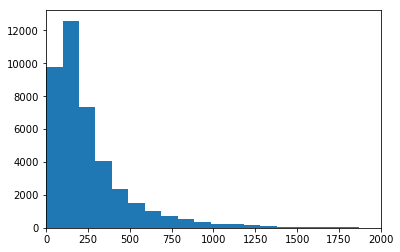

In [35]:
plt.hist(bank.call_duration,50)
plt.xlim(0,2000)

In [48]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=['intercept','call_duration',
 'euribor3m',
 'age',
 'campaign_calls',
 'consumer_price_idx',
 'poutcome_success',
 'nr.employed',
 'previous_calls',
 'consumer_conf_idx',
 'pdays',
 'emp.var.rate',
 'housing_loan_yes',
 'education_University Degree',
 'marital_married',
 'education_High School',
 'poutcome_nonexistent',
 'personal_loan_yes',
 'day_of_week_tue',
 'job_technician',
'contact_type_telephone',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_wed',
 'marital_single',
   
   'job_blue-collar',
 'education_Professional Course',
 'loan_default_unknown', 
 'job_services', 
 'job_management', 
 'month_mar', 
 'month_may', 
 'month_oct', 
 'job_retired',
 'education_Unknown', 
 'job_student', 
]
X1=bank_final[X]
Y1=bank_final[Y]
a = np.ravel(Y1)
a


array([0, 0, 0, ..., 0, 1, 0])

In [49]:
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.208952
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41152
Method:                           MLE   Df Model:                           35
Date:                Sun, 28 May 2017   Pseudo R-squ.:                  0.4064
Time:                        10:16:34   Log-Likelihood:                -8606.3
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
intercept                      -107.3871     17.876     -6.007      0.000      -142.423   -72.351
call_duration                     0.0047    7.4e-05     63.087      0.000         0.005     0.005
euribor3m                        -0.1355      0.089     -1.523      0.128        -0.310     0.039
age                               0.0004      0.002      0.167      0.867        -0.004     0.005
campaign_calls                   -0.0384      0.011     -3.343      0.001        -0.061    -0.016
consumer_price_idx                1.1076      0.118      9.351      0.000         0.875     1.340
poutcome_success                  0.9324      0.210      4.436      0.000         0.520     1.344
nr.employed                       0.0005      0.002      0.322      0.748        -0.003     0.004
previous_calls                   -0.0403      0.059     -0.687      0.492        -0.155     0.075
consumer_conf_idx                 0.0419      0.006      6.822      0.000         0.030     0.054
pdays                            -0.0010      0.000     -4.547      0.000        -0.001    -0.001
emp.var.rate                     -0.7592      0.076     -9.980      0.000        -0.908    -0.610
housing_loan_yes                 -0.0042      0.041     -0.103      0.918        -0.084     0.075
education_University Degree       0.1925      0.067      2.869      0.004         0.061     0.324
marital_married                   0.0097      0.068      0.143      0.886        -0.123     0.142
education_High School             0.0362      0.067      0.537      0.591        -0.096     0.168
poutcome_nonexistent              0.4812      0.093      5.149      0.000         0.298     0.664
personal_loan_yes                -0.0525      0.057     -0.920      0.358        -0.164     0.059
day_of_week_tue                   0.1008      0.065      1.544      0.123        -0.027     0.229
job_technician                    0.0264      0.067      0.397      0.691        -0.104     0.157
contact_type_telephone           -0.5970      0.071     -8.457      0.000        -0.735    -0.459
day_of_week_mon                  -0.1255      0.066     -1.908      0.056        -0.254     0.003
day_of_week_thu                   0.0400      0.064      0.627      0.530        -0.085     0.165
day_of_week_wed                   0.1606      0.065      2.462      0.014         0.033     0.289
marital_single                    0.0751      0.077      0.974      0.330        -0.076     0.226
job_blue-collar                  -0.2131      0.073     -2.920      0.003        -0.356    -0.070
education_Professional Course     0.0897      0.082      1.099      0.272        -0.070     0.250
loan_default_unknown             -0.2980      0.067     -4.448      0.000        -0.429    -0.167
job_services                     -0.1155      0.083     -1.398      0.162        -0.277     0.046
job_management                   -0.0620      0.082     -0.756      0.450        -0.223     0.099
month_m

In [53]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=[
 'poutcome_success',
]
X1=bank_final[X]
Y1=bank_final[Y]
a = np.ravel(Y1)
a



array([0, 0, 0, ..., 0, 1, 0])

In [54]:
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.691600
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41187
Method:                           MLE   Df Model:                            0
Date:                Sun, 28 May 2017   Pseudo R-squ.:                 -0.9646
Time:                        11:37:12   Log-Likelihood:                -28486.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                       nan
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
poutcome_success     0.6240      0.057     11.020      0.000         0.513     0.735
====================================================================================
"""